# Práctica<a class="tocSkip">
## Ciencia de Datos <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Task Details
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

Expected Submission
Submit a well documented notebook with these four sections:

* Section 01: Exploratory Data Analysis
1. Are there any null values or outliers? How will you wrangle/handle them?
1. Are there any variables that warrant transformations?
1. Are there any useful variables that you can engineer with the given data?
1. Do you notice any patterns or anomalies in the data? Can you plot them?
* Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

1. What factors are significantly related to the number of store purchases?
1. Does US fare significantly better than the Rest of the World in terms of total purchases?
1. Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
1. Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
1. Is there a significant relationship between geographical regional and success of a campaign?
* Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

1. Which marketing campaign is most successful?
1. What does the average customer look like for this company?
1. Which products are performing best?
1. Which channels are underperforming?
* Section 04: CMO Recommendations
Bring together everything from Sections 01 to 03 and provide data-driven recommendations/suggestions to your CMO.

**Evaluation**
What one would like to see is a well-defined process of exploratory and statistical analysis with insightful conclusions.

1. Data Exploration - Was the data wrangled properly? How well was the data analyzed? Are there any useful visualizations? Does the reader learn any new techniques through this submission? A great entry will be informative and thought provoking.
1. Statistical Analysis - Were the right statistical tests used? How well was the statistical output interpreted? A great entry will interpret results without the use of any statistical jargon.
1. Business Recommendation - Were the recommendations tied to your analysis in Sections 1-3? Are they data-driven and focused on marketing concepts such as targets, channels, or products?
1. Documentation - Are your code, and notebook well documented so a reader can understand what you did? Are your sources clearly cited? A high quality analysis should be concise and clear at each step so the rationale is easy to follow and the process is reproducible.

1. **ID**=Customer's unique identifier
1. **Year_Birth**=Customer's birth year
1. **Education**=Customer's education level
1. **Marital_Status**=Customer's marital status
1. **Income**=Customer's yearly household income
1. **Kidhome**=Number of children in customer's household
1. **Teenhome**=Number of teenagers in customer's household
1. **Dt_Customer**=Date of customer's enrollment with the company
1. **Recency**=Number of days since customer's last purchase
1. **MntWines**=Amount spent on wine in the last 2 years
1. **MntFruits**=Amount spent on fruits in the last 2 years
1. **MntMeatProducts**=Amount spent on meat in the last 2 years
1. **MntFishProducts**=Amount spent on fish in the last 2 years
1. **MntSweetProducts**=Amount spent on sweets in the last 2 years
1. **MntGoldProds**=Amount spent on gold in the last 2 years
1. **NumDealsPurchases**=Number of purchases made with a discount
1. **NumWebPurchases**=Number of purchases made through the company's web site
1. **NumCatalogPurchases**=Number of purchases made using a catalogue
1. **NumStorePurchases**=Number of purchases made directly in stores
1. **NumWebVisitsMonth**=Number of visits to company's web site in the last month
1. **AcceptedCmp3**=1 if customer accepted the offer in the 3rd campaign, 0 otherwise
1. **AcceptedCmp4**=1 if customer accepted the offer in the 4th campaign, 0 otherwise
1. **AcceptedCmp5**=1 if customer accepted the offer in the 5th campaign, 0 otherwise
1. **AcceptedCmp1**=1 if customer accepted the offer in the 1st campaign, 0 otherwise
1. **AcceptedCmp2**=1 if customer accepted the offer in the 2nd campaign, 0 otherwise
1. **Response**=1 if customer accepted the offer in the last campaign, 0 otherwise
1. **Complain**=1 if customer complained in the last 2 years, 0 otherwise
1. **Country**=Customer's location

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import tensorflow as tf
import sklearn
import math

In [4]:
Data=pd.read_csv('marketing_data.csv')
Data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
list_medium_income=[]
list0=[]
a=pd.DataFrame(Data[' Income '].isna().values,columns=['Incomenan'])
for i in Data[' Income '].copy().dropna():
    foo=int(i.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
    list_medium_income.append(foo)
Data[' Income ']=Data[' Income '].fillna(int(np.mean(list_medium_income)))
for i in Data[' Income ']:
    if i ==int(np.mean(list_medium_income)):
        list0.append(i*1000)
        pass
    else:
        foo=int(i.split('$')[1].split(' ')[0].split('.')[0].replace(",", ""))
        list0.append(foo*1000)
Data=pd.concat([Data.drop(columns=[' Income ','ID']),pd.DataFrame(list0,columns=['Income']),a],axis=1)

In [7]:
day=[]
month=[]
year=[]
for _ in Data['Dt_Customer']:
    _=_.split('/')
    day.append(int(_[1]))
    month.append(int(_[0]))
    year.append(int(_[2]))
Data=pd.concat([Data.drop(columns=['Dt_Customer']),pd.DataFrame(day,columns=['day']),pd.DataFrame(month,columns=['month']),pd.DataFrame(year,columns=['year'])],axis=1)

In [8]:
# How many unique values are in Columns of Data ?
for i in Data.columns:
    print(F'{i}:',len(Data[i].unique()))

Year_Birth: 59
Education: 5
Marital_Status: 8
Kidhome: 3
Teenhome: 3
Recency: 100
MntWines: 776
MntFruits: 158
MntMeatProducts: 558
MntFishProducts: 182
MntSweetProducts: 177
MntGoldProds: 213
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Response: 2
Complain: 2
Country: 8
Income: 1975
Incomenan: 2
day: 31
month: 12
year: 3


In [9]:
Data.head(5)

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Incomenan,day,month,year
0,1970,Graduation,Divorced,0,0,0,189,104,379,111,...,0,0,1,0,SP,84835000,False,16,6,14
1,1961,Graduation,Single,0,0,0,464,5,64,7,...,0,1,1,0,CA,57091000,False,15,6,14
2,1958,Graduation,Married,0,1,0,134,11,59,15,...,0,0,0,0,US,67267000,False,13,5,14
3,1967,Graduation,Together,1,1,0,10,0,1,0,...,0,0,0,0,AUS,32474000,False,11,5,14
4,1989,Graduation,Single,1,0,0,6,16,24,11,...,0,0,1,0,SP,21474000,False,8,4,14


In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Birth           2240 non-null   int64 
 1   Education            2240 non-null   object
 2   Marital_Status       2240 non-null   object
 3   Kidhome              2240 non-null   int64 
 4   Teenhome             2240 non-null   int64 
 5   Recency              2240 non-null   int64 
 6   MntWines             2240 non-null   int64 
 7   MntFruits            2240 non-null   int64 
 8   MntMeatProducts      2240 non-null   int64 
 9   MntFishProducts      2240 non-null   int64 
 10  MntSweetProducts     2240 non-null   int64 
 11  MntGoldProds         2240 non-null   int64 
 12  NumDealsPurchases    2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

C:\Users\joser\AppData\Local\Temp\ipykernel_2096\3925507686.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(Data.corr(),annot=True)


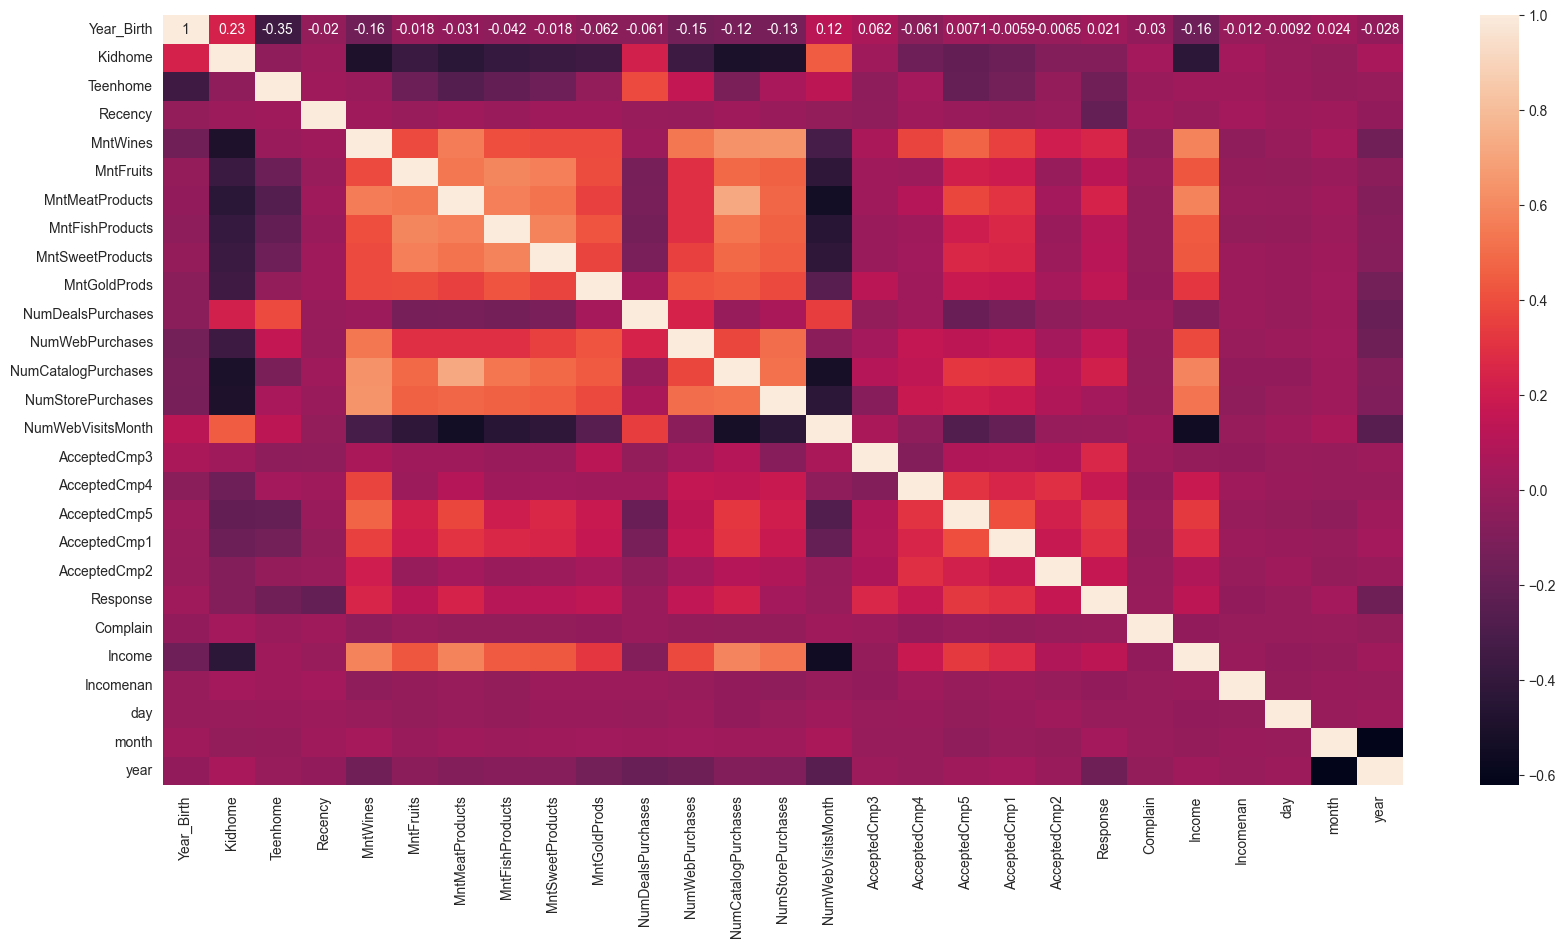

In [11]:
plt.figure(figsize=(20,10))
seaborn.heatmap(Data.corr(),annot=True)
plt.show()

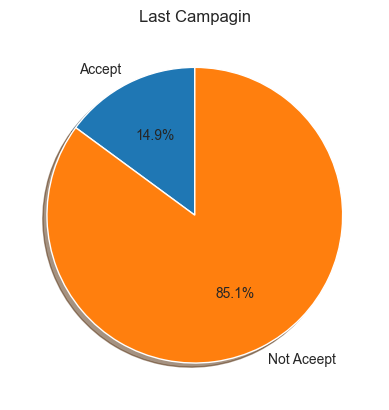

In [12]:
label = 'Accept','Not Aceept'
plt.pie([len(Data['Response'][Data['Response']==1]),len(Data['Response'][Data['Response']==0])],labels=label,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Last Campagin');

In [13]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,3.039357e+02,3.365974e+02,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,2.630223e+01,3.977343e+01,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,1.669500e+02,2.257154e+02,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,3.752545e+01,5.462898e+01,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,2.706295e+01,4.128050e+01,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,4.402188e+01,5.216744e+01,0.0,9.00,24.0,56.00,362.0


In [14]:
for i in Data.columns:
    if Data[i].dtype=='<i8': 
        print('type int64:',i,'Mean:',int(Data[i].mean()))
    else:
        print('type object:',i,'Mode:',Data[i].mode()[0])

type int64: Year_Birth Mean: 1968
type object: Education Mode: Graduation
type object: Marital_Status Mode: Married
type int64: Kidhome Mean: 0
type int64: Teenhome Mean: 0
type int64: Recency Mean: 49
type int64: MntWines Mean: 303
type int64: MntFruits Mean: 26
type int64: MntMeatProducts Mean: 166
type int64: MntFishProducts Mean: 37
type int64: MntSweetProducts Mean: 27
type int64: MntGoldProds Mean: 44
type int64: NumDealsPurchases Mean: 2
type int64: NumWebPurchases Mean: 4
type int64: NumCatalogPurchases Mean: 2
type int64: NumStorePurchases Mean: 5
type int64: NumWebVisitsMonth Mean: 5
type int64: AcceptedCmp3 Mean: 0
type int64: AcceptedCmp4 Mean: 0
type int64: AcceptedCmp5 Mean: 0
type int64: AcceptedCmp1 Mean: 0
type int64: AcceptedCmp2 Mean: 0
type int64: Response Mean: 0
type int64: Complain Mean: 0
type object: Country Mode: SP
type int64: Income Mean: 52247248
type object: Incomenan Mode: False
type int64: day Mean: 15
type int64: month Mean: 6
type int64: year Mean: 13


C:\Users\joser\AppData\Local\Temp\ipykernel_2096\3354836508.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 5))


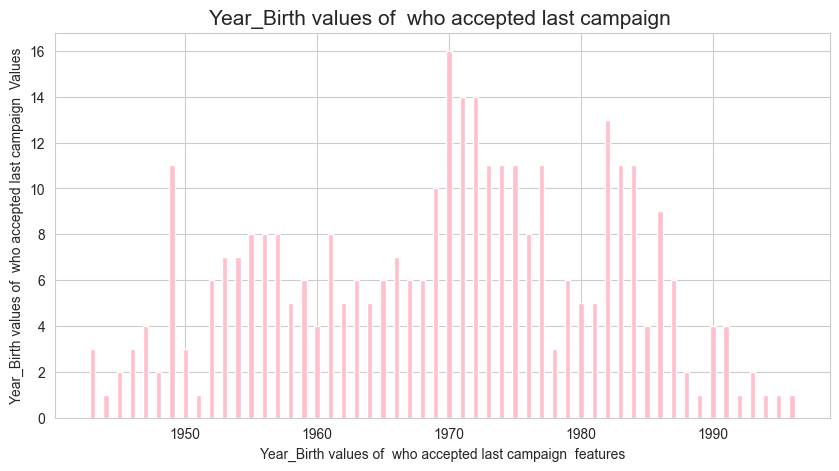

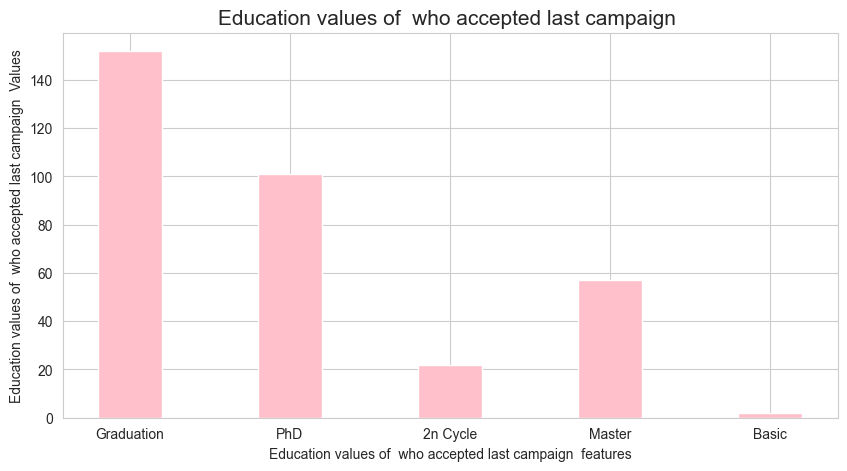

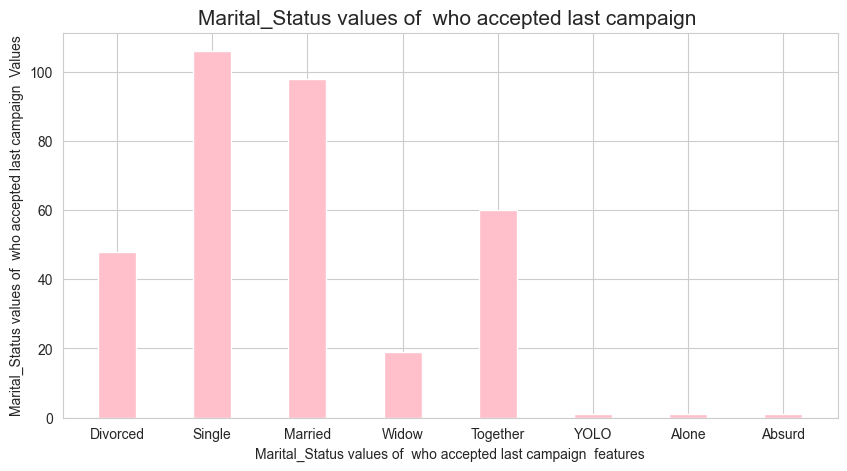

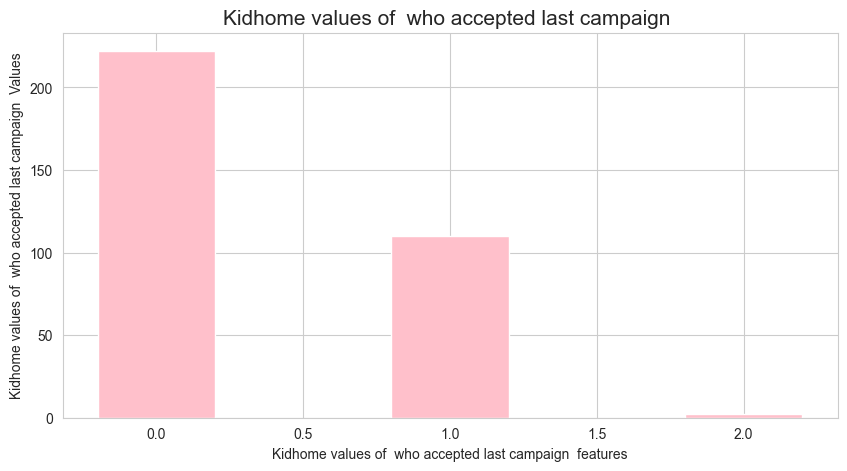

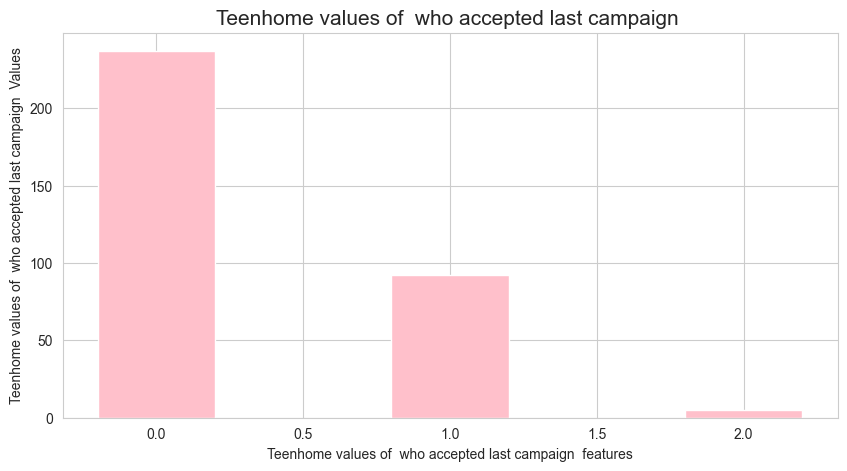

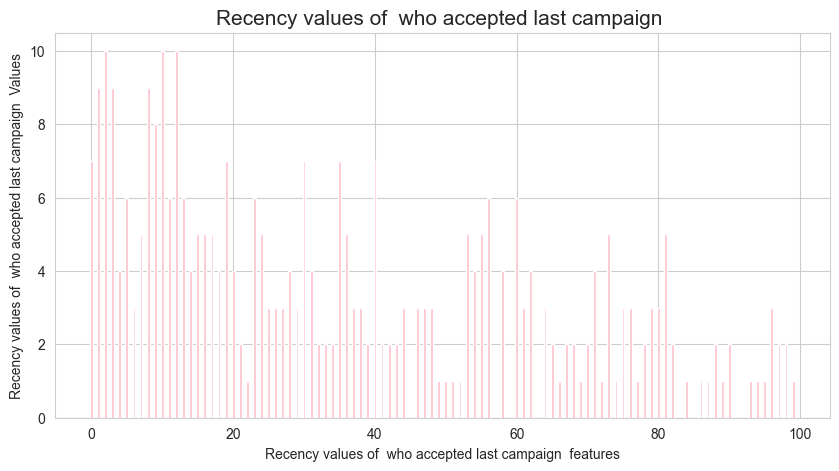

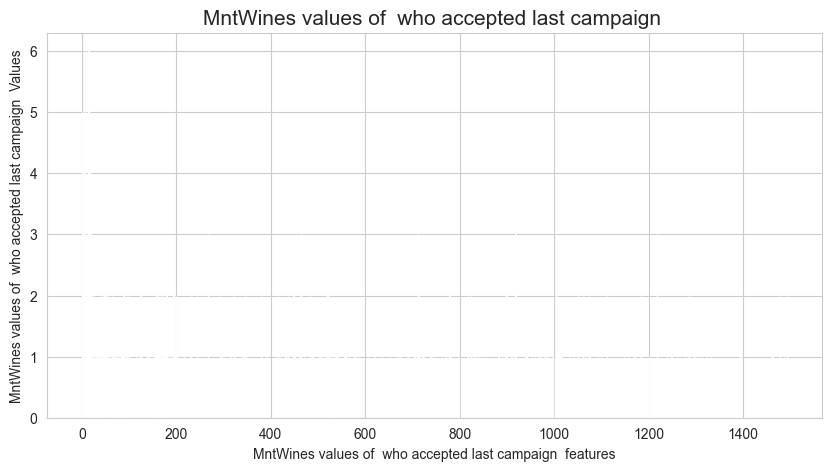

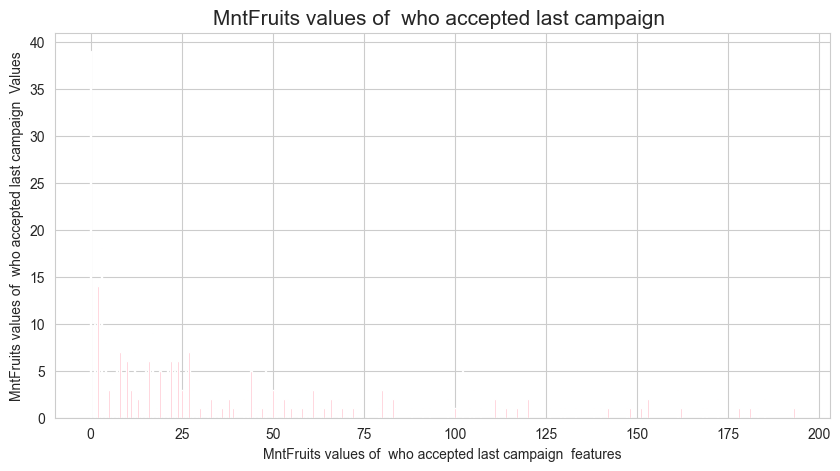

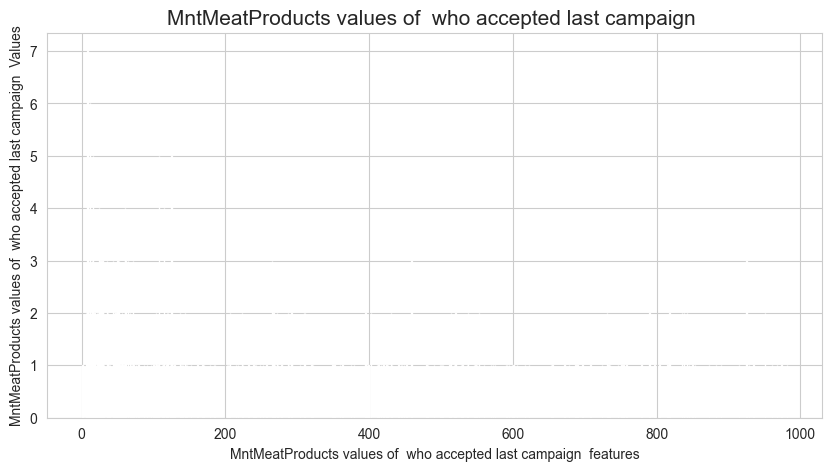

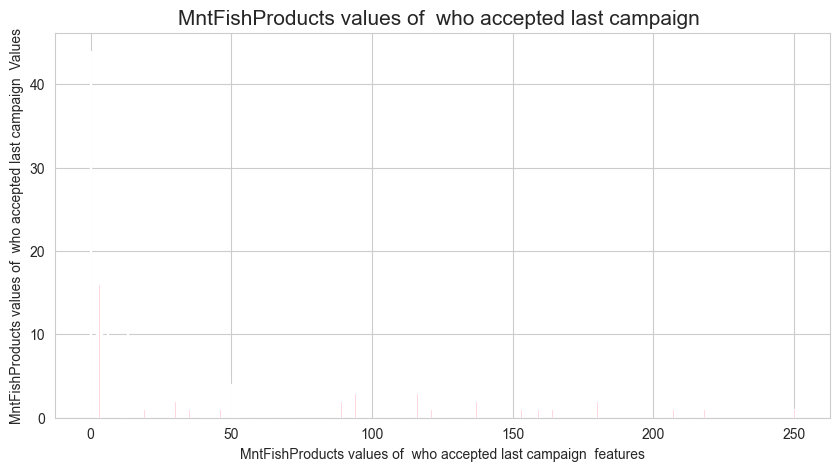

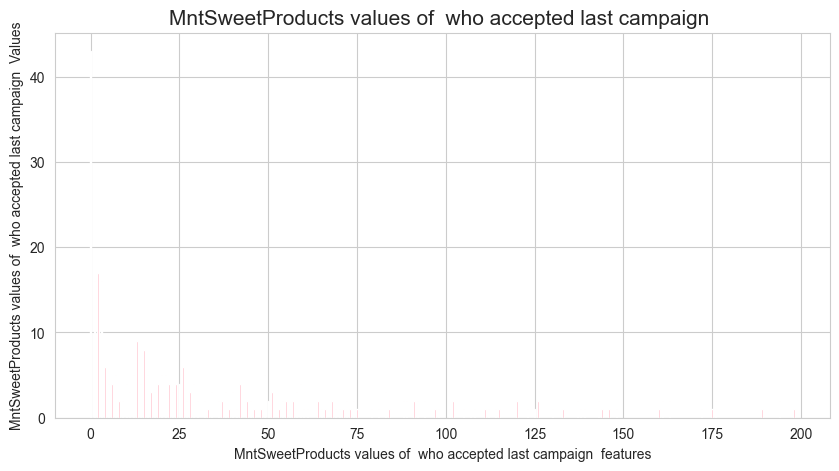

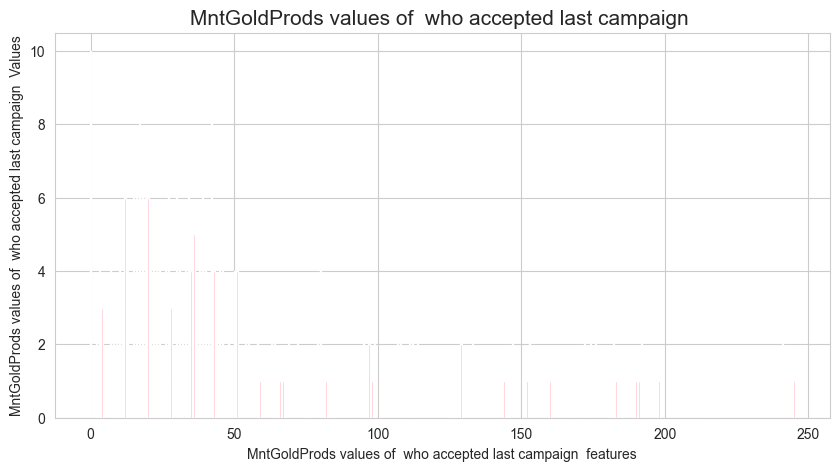

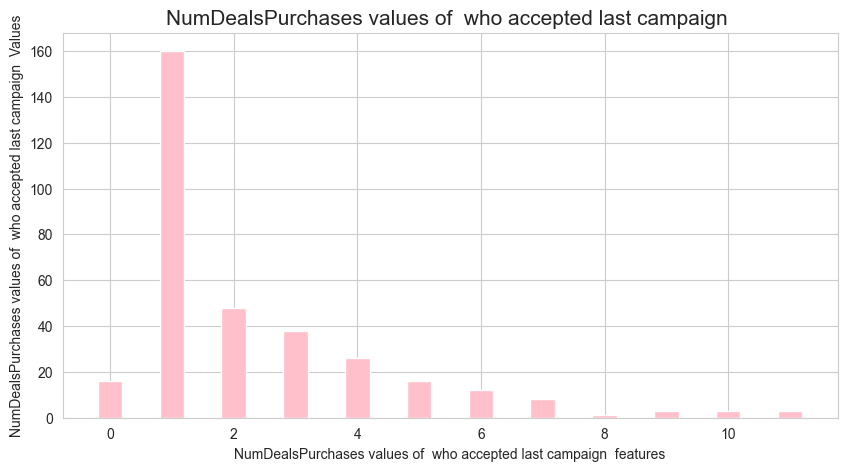

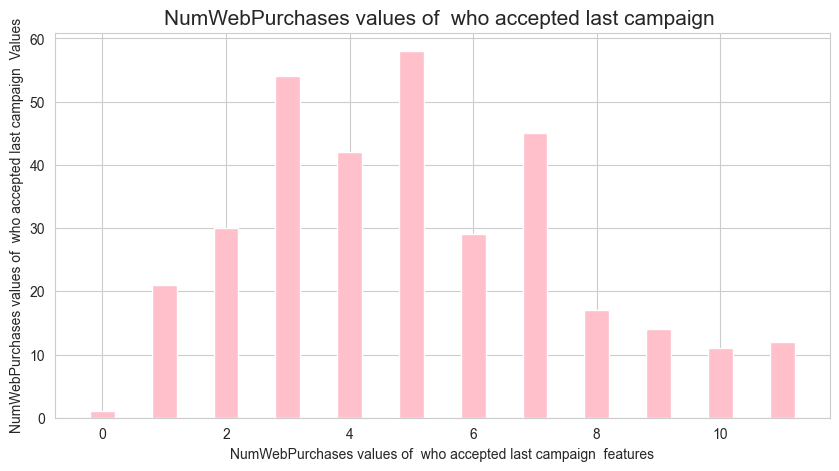

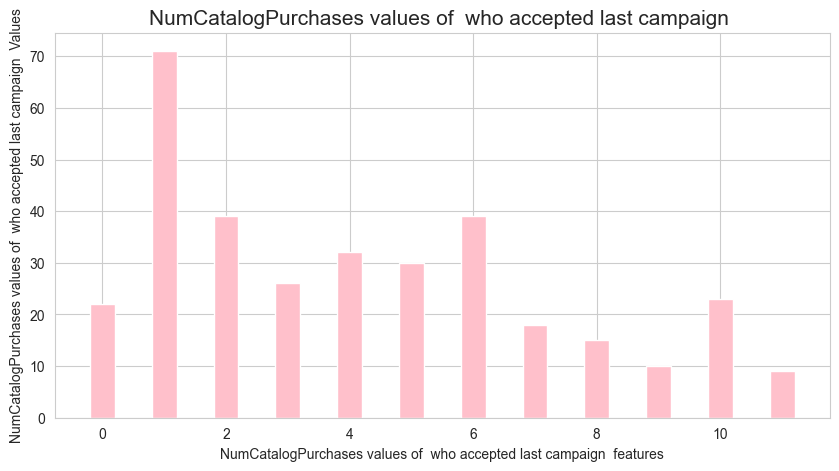

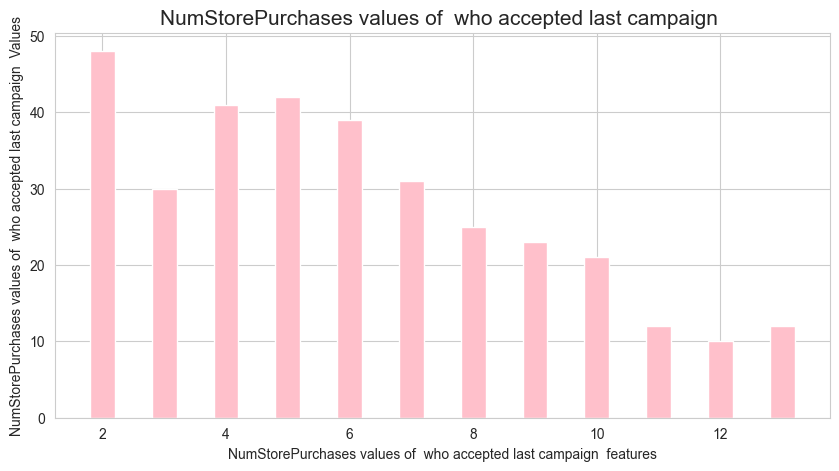

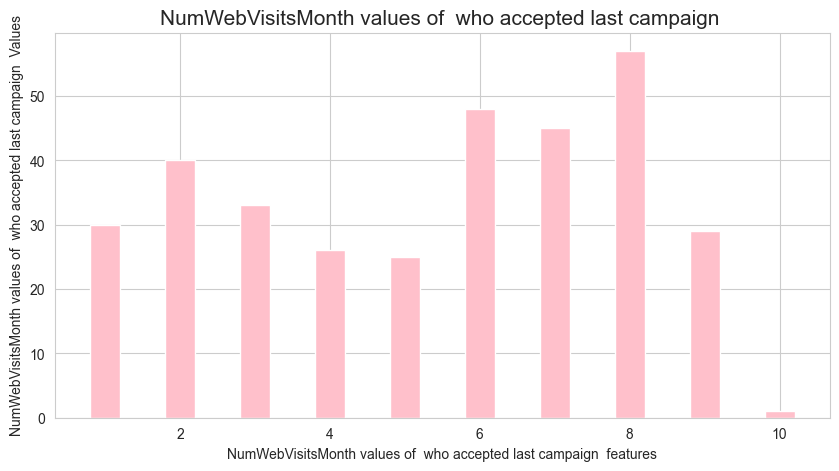

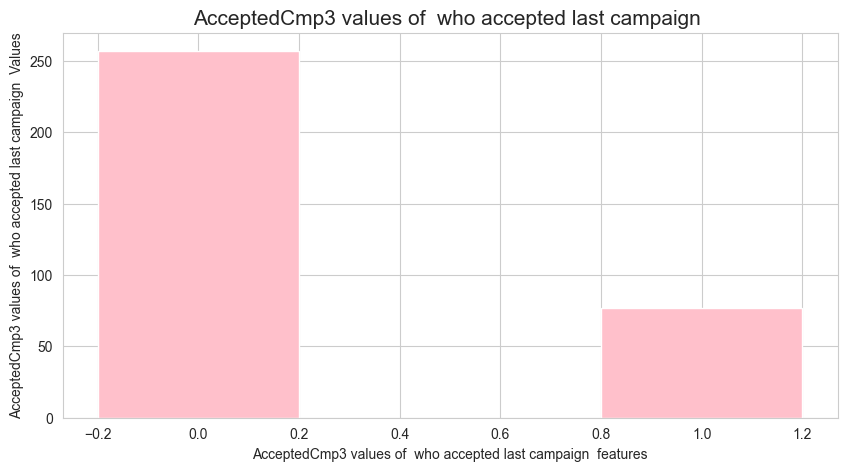

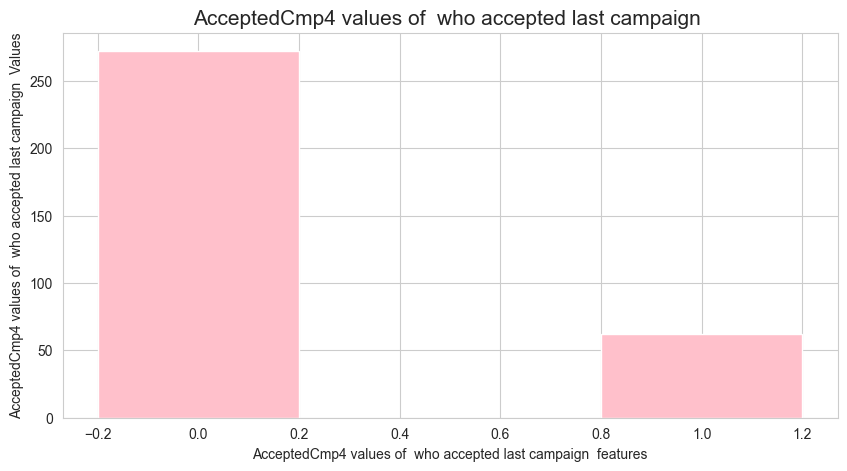

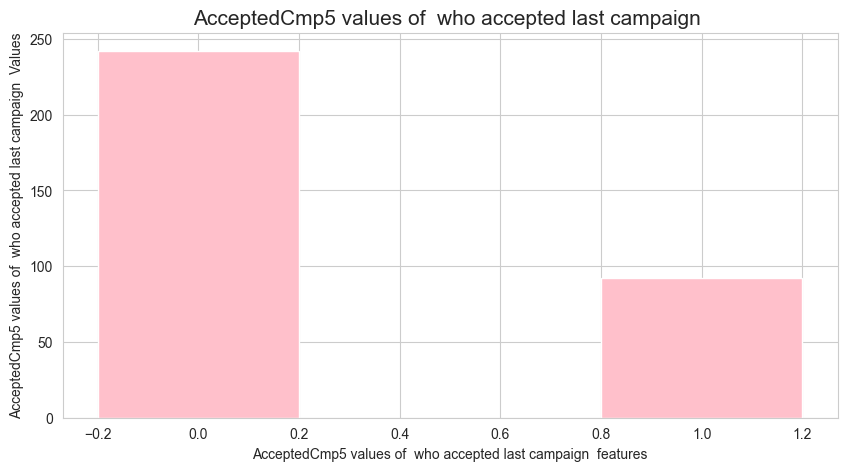

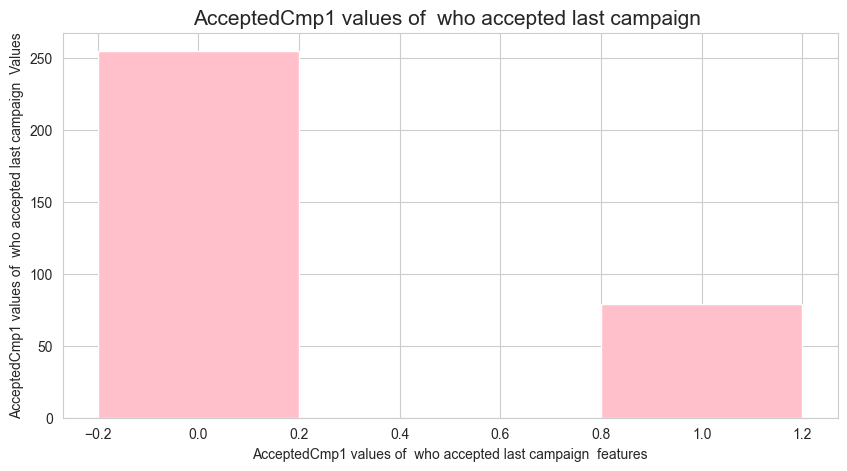

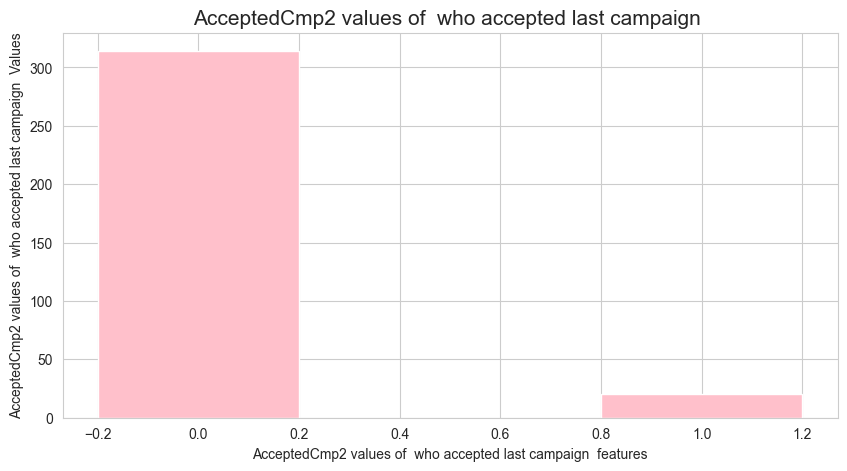

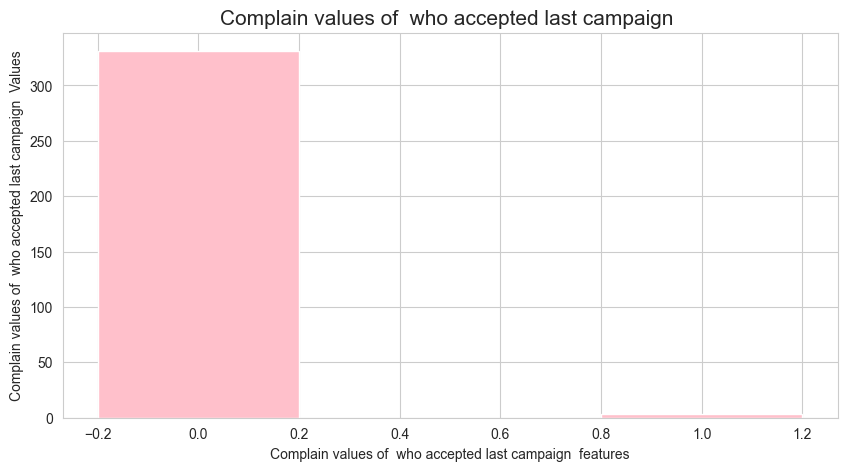

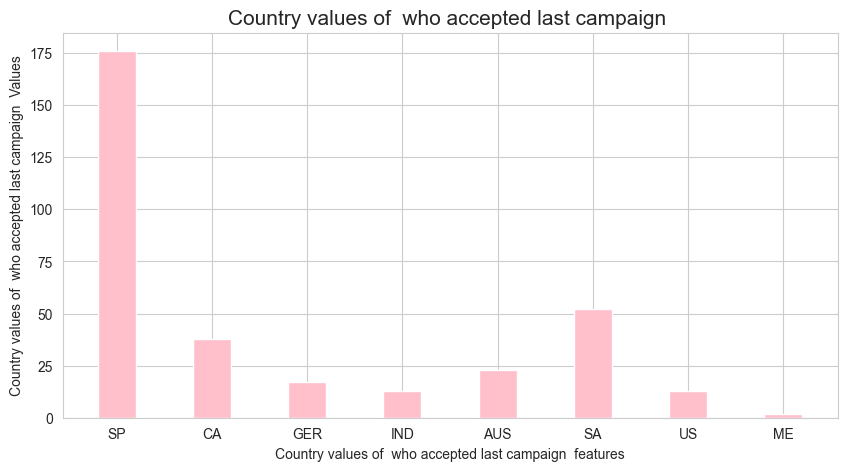

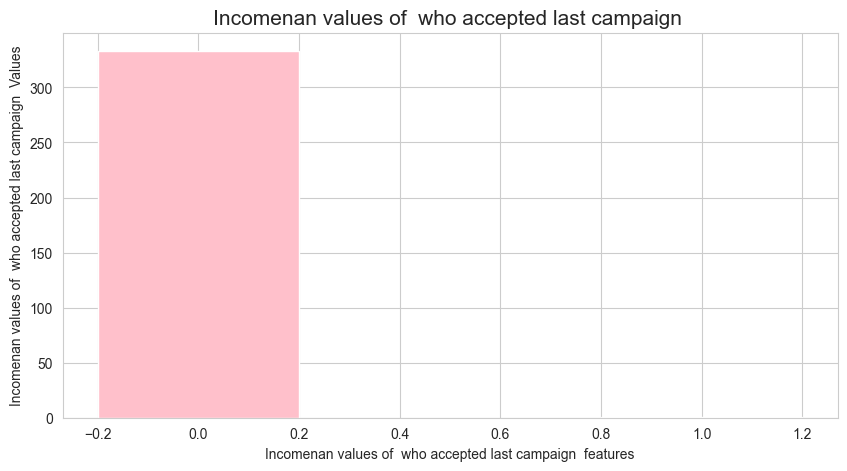

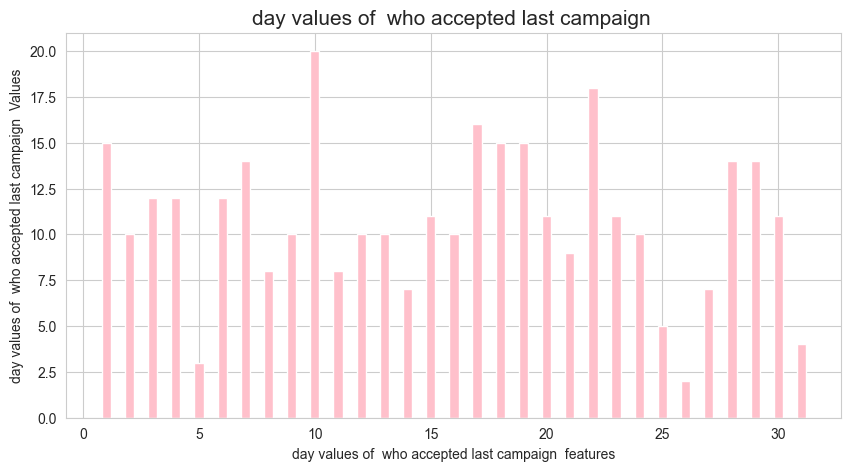

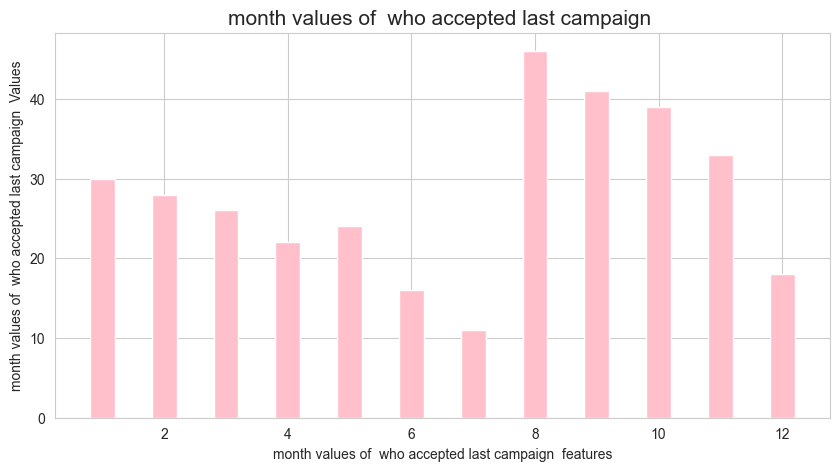

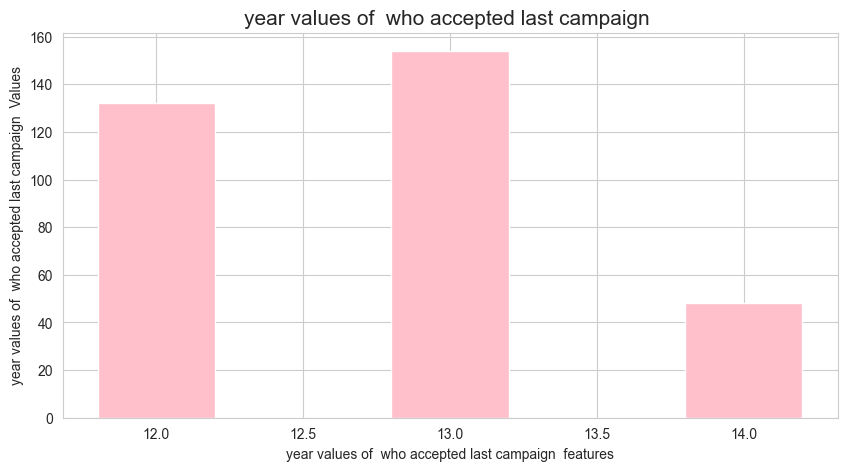

In [15]:
for _ in Data.columns:
    if _=='Response'or _=='Income':
        pass
    else:
        fig = plt.figure(figsize = (10, 5))
        uniqe_list=[i for i in Data[Data['Response']==1][f'{_}'].unique()]
        uniqe_values=[len(Data[Data['Response']==1][f'{_}'][Data[Data['Response']==1][f'{_}']==i]) for i in Data[Data['Response']==1][f'{_}'].unique()]

        plt.bar(uniqe_list, uniqe_values, color ='pink',width = 0.4)
        plt.xlabel(f"{_} values of  who accepted last campaign  features",fontsize=10)
        plt.ylabel(f"{_} values of  who accepted last campaign  Values",fontsize=10)
        plt.title(f"{_} values of  who accepted last campaign ",fontsize=15);

In [16]:
# mean,mode of accept response 
for i in Data.columns:
    if Data[i].dtype=='<i8': 
        print('type int64:',i,'Mean:',int(Data[i][Data['Response']==1].mean()))
    else:
        print('type object:',i,'Mode:',Data[i][Data['Response']==1].mode()[0])

type int64: Year_Birth Mean: 1969
type object: Education Mode: Graduation
type object: Marital_Status Mode: Single
type int64: Kidhome Mean: 0
type int64: Teenhome Mean: 0
type int64: Recency Mean: 35
type int64: MntWines Mean: 502
type int64: MntFruits Mean: 38
type int64: MntMeatProducts Mean: 294
type int64: MntFishProducts Mean: 52
type int64: MntSweetProducts Mean: 38
type int64: MntGoldProds Mean: 61
type int64: NumDealsPurchases Mean: 2
type int64: NumWebPurchases Mean: 5
type int64: NumCatalogPurchases Mean: 4
type int64: NumStorePurchases Mean: 6
type int64: NumWebVisitsMonth Mean: 5
type int64: AcceptedCmp3 Mean: 0
type int64: AcceptedCmp4 Mean: 0
type int64: AcceptedCmp5 Mean: 0
type int64: AcceptedCmp1 Mean: 0
type int64: AcceptedCmp2 Mean: 0
type int64: Response Mean: 1
type int64: Complain Mean: 0
type object: Country Mode: SP
type int64: Income Mean: 60185835
type object: Incomenan Mode: False
type int64: day Mean: 15
type int64: month Mean: 6
type int64: year Mean: 12


In [17]:
# mean,mode of don't accept response 
for i in Data.columns:
    if Data[i].dtype=='<i8': 
        print('type int64:',i,'Mean:',int(Data[i][Data['Response']==0].mean()))
    else:
        print('type object:',i,'Mode:',Data[i][Data['Response']==0].mode()[0])

type int64: Year_Birth Mean: 1968
type object: Education Mode: Graduation
type object: Marital_Status Mode: Married
type int64: Kidhome Mean: 0
type int64: Teenhome Mean: 0
type int64: Recency Mean: 51
type int64: MntWines Mean: 269
type int64: MntFruits Mean: 24
type int64: MntMeatProducts Mean: 144
type int64: MntFishProducts Mean: 34
type int64: MntSweetProducts Mean: 25
type int64: MntGoldProds Mean: 40
type int64: NumDealsPurchases Mean: 2
type int64: NumWebPurchases Mean: 3
type int64: NumCatalogPurchases Mean: 2
type int64: NumStorePurchases Mean: 5
type int64: NumWebVisitsMonth Mean: 5
type int64: AcceptedCmp3 Mean: 0
type int64: AcceptedCmp4 Mean: 0
type int64: AcceptedCmp5 Mean: 0
type int64: AcceptedCmp1 Mean: 0
type int64: AcceptedCmp2 Mean: 0
type int64: Response Mean: 0
type int64: Complain Mean: 0
type object: Country Mode: SP
type int64: Income Mean: 50856121
type object: Incomenan Mode: False
type int64: day Mean: 15
type int64: month Mean: 6
type int64: year Mean: 13


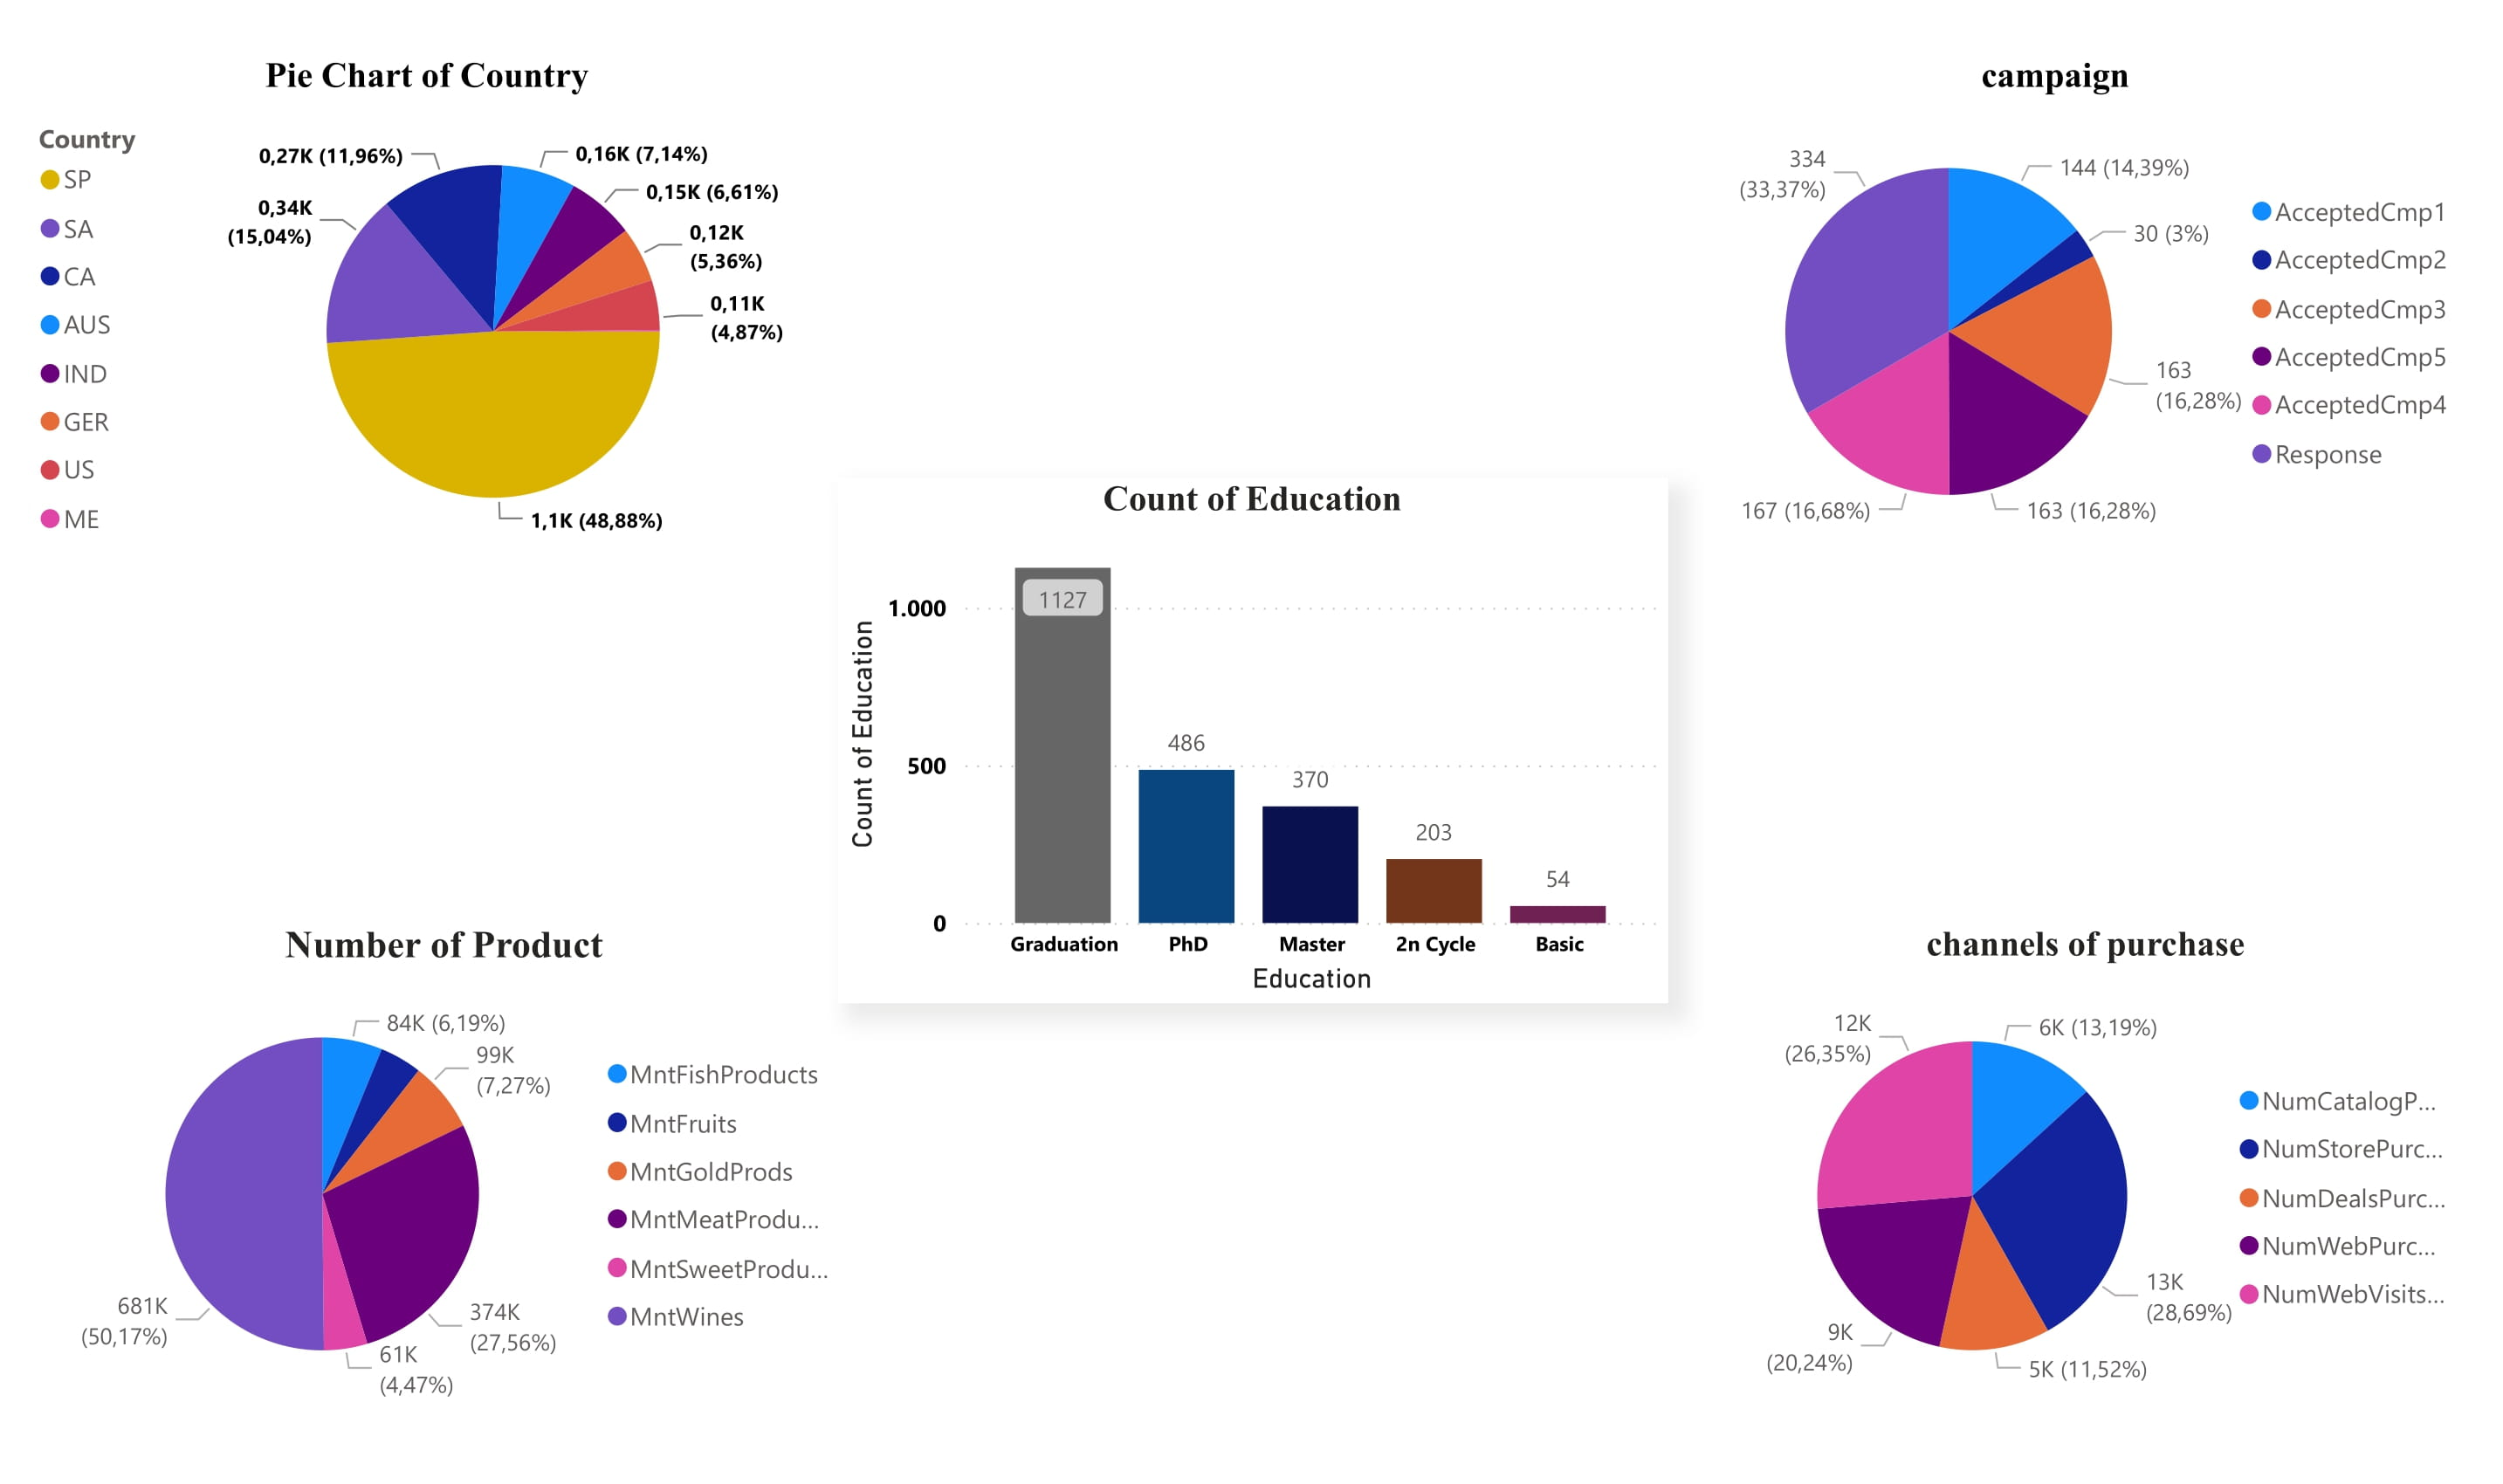

In [18]:
Data.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,Incomenan,day,month,year
0,1970,Graduation,Divorced,0,0,0,189,104,379,111,...,0,0,1,0,SP,84835000,False,16,6,14
1,1961,Graduation,Single,0,0,0,464,5,64,7,...,0,1,1,0,CA,57091000,False,15,6,14
2,1958,Graduation,Married,0,1,0,134,11,59,15,...,0,0,0,0,US,67267000,False,13,5,14
3,1967,Graduation,Together,1,1,0,10,0,1,0,...,0,0,0,0,AUS,32474000,False,11,5,14
4,1989,Graduation,Single,1,0,0,6,16,24,11,...,0,0,1,0,SP,21474000,False,8,4,14


In [19]:
education=pd.get_dummies(Data['Education'],drop_first=True)
marital=pd.get_dummies(Data['Marital_Status'],drop_first=True)
country=pd.get_dummies(Data['Country'],drop_first=True)
ıncomenan=pd.get_dummies(Data['Incomenan'],drop_first=True)

In [20]:
new_data=pd.concat([Data.drop(columns=['Education','Marital_Status','Incomenan','Country']),education,marital,country,ıncomenan],axis=1)

In [21]:
new_data.head()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Widow,YOLO,CA,GER,IND,ME,SA,SP,US,True
0,1970,0,0,0,189,104,379,111,189,218,...,0,0,0,0,0,0,0,1,0,0
1,1961,0,0,0,464,5,64,7,0,37,...,0,0,1,0,0,0,0,0,0,0
2,1958,0,1,0,134,11,59,15,2,30,...,0,0,0,0,0,0,0,0,1,0
3,1967,1,1,0,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1989,1,0,0,6,16,24,11,0,34,...,0,0,0,0,0,0,0,1,0,0


In [22]:
x=new_data.copy().drop(columns=['Response']).values
y=new_data['Response'].values

# Model

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [24]:
print('Train_x:',x_train.shape)
print('Train_y:',y_train.shape)
print('Test_x:',x_test.shape)
print('Test_y:',y_test.shape)

Train_x: (2016, 44)
Train_y: (2016,)
Test_x: (224, 44)
Test_y: (224,)


In [25]:
from sklearn.preprocessing import StandardScaler
obje_ss=StandardScaler()

x_train_ss=obje_ss.fit_transform(x_train)
x_test_ss=obje_ss.fit_transform(x_test)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_le=LogisticRegression(random_state=42,max_iter=10000)
model_le.fit(x_train,y_train)
parameters = {'C':[0.8,0.9,1,1.1,1.2]}
model_le_grid = GridSearchCV(model_le, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train,y_train)
print(model_le_grid.best_params_)

print('Logistic Regression Train score:',model_le.score(x_train,y_train)*100)
print('Logistic Regression Cros validation score:',model_le_grid.best_score_*100)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'C': 1.1}
Logistic Regression Train score: 85.41666666666666
Logistic Regression Cros validation score: 85.46549431062509


In [27]:
model_le=LogisticRegression(random_state=42,C=0.8)
model_le.fit(x_train,y_train)
print('Logistic Regression Train score:',model_le.score(x_train,y_train)*100)

Logistic Regression Train score: 85.21825396825396


C:\Users\joser\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Classication 

In [28]:
from sklearn import svm

model_svc=svm.SVC(random_state=42)
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train_ss,y_train)
print(model_svc_grid.best_params_)


print('Support Vecktor Classification Cros validation score:',model_svc_grid.best_score_*100)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'C': 0.8, 'degree': 3, 'kernel': 'linear'}
Support Vecktor Classification Cros validation score: 89.08575932220086


In [29]:
model_svc=svm.SVC(random_state=42,C=0.8,kernel='linear')
model_svc.fit(x_train_ss,y_train)
print('Support Vecktor Classification Train score:',model_svc.score(x_train_ss,y_train)*100)

Support Vecktor Classification Train score: 90.07936507936508


## Tree

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rfc=RandomForestClassifier(n_jobs=-1)
parameters = {'n_estimators':[50,100,200,300,400],'max_depth':[3,4,5,6]}
model_rfc_grid = GridSearchCV(model_rfc, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train,y_train)
print(model_rfc_grid.best_params_)

print('Random Forest Classifier Cros validation score:',model_rfc_grid.best_score_*100)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'max_depth': 6, 'n_estimators': 400}
Random Forest Classifier Cros validation score: 87.25185951430963


In [31]:
model_rfc=RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=6)
model_rfc.fit(x_train,y_train)
print('Random Forest Classifier Train score:',model_rfc.score(x_train,y_train)*100)

Random Forest Classifier Train score: 89.53373015873017


In [36]:
from xgboost.sklearn import XGBClassifier

model_xgb=XGBClassifier(use_label_encoder=False,n_jobs=-1,random_state=42,eval_metric='logloss')
parameters = {'n_estimators':[50,100,200],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.01]}
model_xgb_grid = GridSearchCV(model_xgb, parameters,cv=10,verbose=1).fit(x_train,y_train)
print(model_xgb_grid.best_params_)

print('XGB Classifier Cros validation score:',model_xgb_grid.best_score_*100)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
XGB Classifier Cros validation score: 89.6357322299394


In [37]:
model_xgb=XGBClassifier(use_label_encoder=False,n_jobs=-1,random_state=42,n_estimators=50,max_depth=5,learning_rate=0.1,eval_metric='logloss')
model_xgb.fit(x_train,y_train)
print('XGB Classifier Classifier Train score:',model_xgb.score(x_train,y_train)*100)

XGB Classifier Classifier Train score: 95.38690476190477


## DNN

In [38]:
model_dnn=tf.keras.Sequential()

model_dnn.add(tf.keras.layers.Dense(25,activation='relu',input_dim=44))
model_dnn.add(tf.keras.layers.Dropout(0.5))
model_dnn.add(tf.keras.layers.Dense(10,activation='relu'))
model_dnn.add(tf.keras.layers.Dropout(0.5))
model_dnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model_dnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=['accuracy'])

In [39]:
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1125      
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,396
Trainable params: 1,396
Non-trainable params: 0
_________________________________________________________________


In [40]:
epoch=300
history=model_dnn.fit(x_train_ss,y_train,epochs=epoch,verbose=0)   

In [41]:
print('Loss:',history.history['loss'][-1])
print('Accuracy: %',history.history['accuracy'][-1]*100)

Loss: 0.15320894122123718
Accuracy: % 92.11309552192688


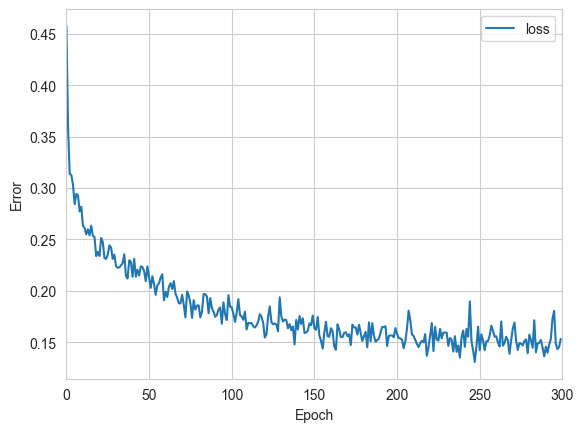

In [42]:
plt.plot(history.history['loss'], label='loss')
plt.xlim([0,epoch])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [43]:
from sklearn.metrics import classification_report

def test_score(model_name):
  for i in model_name: 
    print(f'{i.__class__} \n{classification_report(y_test,i.predict(x_test))}')

def test_score_ss(model_name):
  for i in model_name:
    print(f'{i.__class__} \n{classification_report(y_test,i.predict(x_test_ss))}') 

liste_test=[model_le,model_rfc,model_xgb]
liste_test_ss=[model_svc]

test_score(liste_test)
test_score_ss(liste_test_ss)

liste_dnn=[]
for i in model_dnn.predict(x_test_ss):
  if i<0.5:
    liste_dnn.append(0)
  else:
    liste_dnn.append(1)
print(f'{model_dnn.__class__} \n{classification_report(y_test,liste_dnn)}')

<class 'sklearn.linear_model._logistic.LogisticRegression'> 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       193
           1       1.00      0.06      0.12        31

    accuracy                           0.87       224
   macro avg       0.93      0.53      0.53       224
weighted avg       0.89      0.87      0.82       224

<class 'sklearn.ensemble._forest.RandomForestClassifier'> 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       193
           1       0.78      0.23      0.35        31

    accuracy                           0.88       224
   macro avg       0.83      0.61      0.64       224
weighted avg       0.87      0.88      0.86       224

<class 'xgboost.sklearn.XGBClassifier'> 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       193
           1       0.67      0.45      0.54        31

    accuracy         

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).